In [2]:
%matplotlib inline

/Users/avivbachan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df525=pd.read_csv('SwartFig525.csv', sep=',',header=None,names=['d13C','t'])
df525.head()

,d13C,t
0,0.23,0.00
1,0.19,-0.50
2,0.42,-0.99
3,0.41,-1.50
4,0.63,-2.02


In [5]:
df817=pd.read_csv('SwartFig817Bulk.csv', sep=',',header=None,names=['d13C','t'])
df817.head()

,d13C,t
0,2.08,-0.08
1,2.11,-0.10
2,2.14,-0.10
3,1.78,-0.10
4,1.84,-0.11


In [6]:
df817 = df817.groupby(by='t',as_index=False).mean()

In [7]:
# def compute_mean(ret):
#     return np.mean(ret)
# compute_mean
df817.rolling_mean = df817.d13C.rolling(center=False, window=50,min_periods=1).apply(lambda x: np.mean(x) )
df817.rolling_sd = df817.d13C.rolling(center=False, window=50,min_periods=1).apply(lambda x: np.std(x) )


In [8]:
d13C817_interp_mean = np.interp(df525.t, df817.t, df817.rolling_mean)[0:17]
d13C817_interp_sd = np.interp(df525.t, df817.t, df817.rolling_sd)[0:17]

In [9]:
print d13C817_interp_mean
print d13C817_interp_sd

[ 2.08064058  1.90174528  1.59448714  1.38502214  1.15231611  1.04185
  1.0531      1.0388      1.07707778  1.10886667  1.04268095  0.93754
  0.92616     0.97405889  0.90962832  0.88521739  0.66428571]
[ 0.24380553  0.26083737  0.14362481  0.18657417  0.17804054  0.08989829
  0.08464567  0.09370464  0.10668537  0.10804908  0.15620606  0.15584777
  0.15921261  0.13639186  0.15373844  0.17591054  0.00428571]


<Container object of 3 artists>

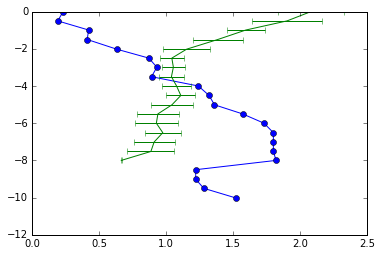

In [10]:
plt.plot(df525.d13C,df525.t,'-o')
plt.errorbar(d13C817_interp_mean, df525.t[0:17], xerr=d13C817_interp_sd)

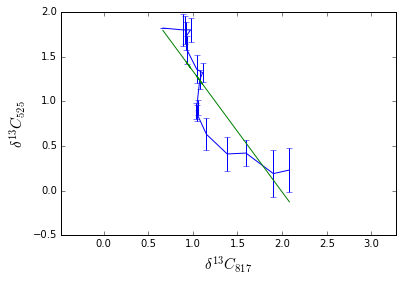

In [11]:
plt.errorbar(d13C817_interp_mean,df525.d13C[0:17],yerr=d13C817_interp_sd)
plt.axis('equal')
plt.xlabel('$\delta^{13}C_{817}$',fontsize = 15)
plt.ylabel('$\delta^{13}C_{525}$',fontsize = 15)
polyCoef = np.polyfit(d13C817_interp_mean, df525.d13C[0:17], 1)
yls = d13C817_interp_mean*polyCoef[0] + polyCoef[1]
plt.plot(d13C817_interp_mean,yls)


In [12]:
d13C_volc = -5
eps = 25
f_org = 0.25

d13C_carb_s = np.linspace(start=-5,stop=5,num=10)

Lambda = np.linspace(start=.1,stop=0.5,num=5)

d13C_carb_o = [(d13C_volc + f_org*eps - (1-Lam)*d13C_carb_s)/Lam for Lam in Lambda]

d13C_carb_o = np.transpose(d13C_carb_o) 
d13C_carb_s = np.transpose(d13C_carb_s)


In [13]:
print d13C_carb_o #rows are delta cols are lambda

[[ 57.5         26.25        15.83333333  10.625        7.5       ]
 [ 47.5         21.80555556  13.24074074   8.95833333   6.38888889]
 [ 37.5         17.36111111  10.64814815   7.29166667   5.27777778]
 [ 27.5         12.91666667   8.05555556   5.625        4.16666667]
 [ 17.5          8.47222222   5.46296296   3.95833333   3.05555556]
 [  7.5          4.02777778   2.87037037   2.29166667   1.94444444]
 [ -2.5         -0.41666667   0.27777778   0.625        0.83333333]
 [-12.5         -4.86111111  -2.31481481  -1.04166667  -0.27777778]
 [-22.5         -9.30555556  -4.90740741  -2.70833333  -1.38888889]
 [-32.5        -13.75        -7.5         -4.375       -2.5       ]]


(-30, 20)

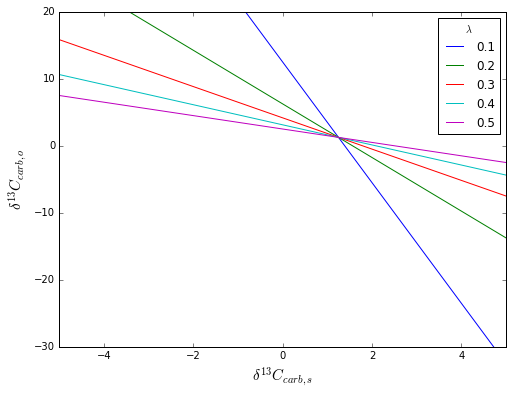

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(d13C_carb_s,d13C_carb_o)
# plt.xlim(0,1)

# lgd = plt.legend(d13C_carb_s, title='$\delta^{13}C_{carb,s}$',loc='center left', bbox_to_anchor=(1, 0.5))

plt.legend(Lambda,title='$\lambda$')
plt.xlabel('$\delta^{13}C_{carb,s}$',fontsize = 15)
plt.ylabel('$\delta^{13}C_{carb,o}$',fontsize = 15)

# a = plt.axes([.2, .4, .3, .3])
# plt.plot(Lambda,d13C_carb_0)
plt.xlim(-5,5)
plt.ylim(-30,20)

# plt.savefig('ShelfCarb.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

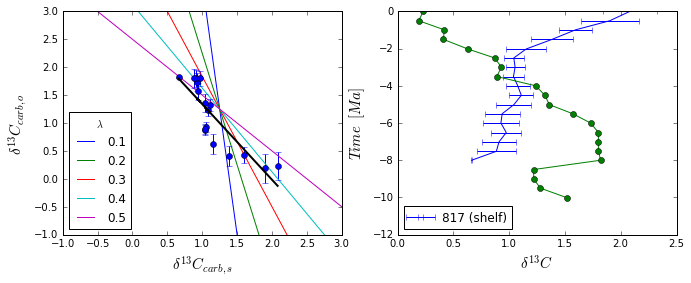

In [19]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)

#plot model
l2=plt.plot(d13C_carb_s,d13C_carb_o)
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.legend(Lambda,title='$\lambda$',loc=3)
# lgd = plt.legend(Lambda, title='$\lambda$',loc='center left', bbox_to_anchor=(-0.50, 0.5))

plt.xlabel('$\delta^{13}C_{carb,s}$',fontsize = 15)
plt.ylabel('$\delta^{13}C_{carb,o}$',fontsize = 15)

#add data
plt.errorbar(d13C817_interp_mean,df525.d13C[0:17],yerr=d13C817_interp_sd,fmt='ob')
plt.plot(d13C817_interp_mean,yls,'k',linewidth=2.0)

plt.subplot(1,2,2)
ll1 = plt.errorbar(d13C817_interp_mean, df525.t[0:17], xerr=d13C817_interp_sd)
ll2 = plt.plot(df525.d13C,df525.t,'-o')

plt.xlabel('$\delta^{13}C$',fontsize = 15)
plt.ylabel('$Time \;\; [Ma]$',fontsize = 15)
plt.legend([ll1],['817 (shelf)'],loc=3)

plt.savefig('/Users/avivbachan/Google_Drive/Research/PennStatePostdoc/Phanerozoic_d13C/Fall_2016_AJS_submission/AJS reviews and revisions/Figures/SwartFig/ShelfCarb.pdf')

In [178]:
ll1.lines


(<matplotlib.lines.Line2D at 0x12bfbdd50>,
 (<matplotlib.lines.Line2D at 0x12bfbd550>,
  <matplotlib.lines.Line2D at 0x12bfbd650>),
 (<matplotlib.collections.LineCollection at 0x12bfa3c10>,))

In [182]:
cd()

[Errno 2] No such file or directory: '()'
/Users/avivbachan/Google_Drive/Research/PennStatePostdoc/Phanerozoic_d13C/Fall_2016_AJS_submission/AJS reviews and revisions/Figures/SwartFig
